<a href="https://colab.research.google.com/github/Sylver640/ADA-Informes/blob/main/Informe_BellmanFord.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Descripción del problema (camino más corto)
---
**Entrada**: Un grafo dirigido $G=(V,E)$, un vértice fuente $s\in V$, y un valor real $l_e \geq 0$ asociado a cada arco $e\in E$.

**Salida**: La distancia más corta $dist(s,v)$ para cada vértice $v\in V$.

----

Continuando la linea de problemas clásicos en la teoría de grafos, era imposible dejar fuera al conocido **camino más corto**, en este caso con una fuente única. En términos generales, esta versión del problema tiene como objetivo encontrar la **distancia más corta** entre un vértice inicial o fuente $s$ y todos los nodos del grafo dirigido $G = (V, E)$. Definiremos la distancia o largo de un camino como la suma de sus arcos. 

Por ejemplo, en el siguiente grafo, las distancias más cortas entre $s$ y el resto de los nodos son: $distancia(s,s)=0$, $distancia(s,v)=1$, $distancia(s,w)=3$ y $distancia(s,t)=6$.

![image](https://chartreuse-goal-d5c.notion.site/image/https%3A%2F%2Fs3-us-west-2.amazonaws.com%2Fsecure.notion-static.com%2F9353642d-b383-4a2c-96b0-479eb5240879%2FUntitled.png?table=block&id=0491d913-c844-4de0-a5a4-9b1bfe386320&spaceId=4f8bebe4-a843-44d2-b6ee-51e2006a90d1&width=2000&userId=&cache=v2)

Un algoritmo que logra entregar una solución óptima a esta problemática es el conocido **algoritmo de Dijkstra**, el cual es capaz de encontrar la distancia más corta en grafos con solamente arcos positivos. 

No obstante, esta problemática no se limita a tan solo aplicaciones que sean de esta índole. Por lo tanto, una versión revisada del problema que permita esto tendría las siguientes características:

---

**Entrada**: Un grafo dirigido $G=(V,E)$, un vértice fuente $s\in V$, y un valor real $l_e$ asociado a cada arco $e\in E$.

**Salida**: Una de las siguientes opciones:

1. La distancia más corta $dist(s,v)$ para cada vértice $v\in V$.
2. Una declaración indicando que $G$ contiene un ciclo negativo.

---

Así tenemos el mismo problema, el cual nuevamente tiene el objetivo de encontrar el camino más corto desde una fuente única. Esto sobre grafos dirigidos y con arcos **positivos o negativos**. Sin embargo, con algo más de versatilidad tenemos una limitante, y estos son los llamados **ciclos negativos**, los cuales impiden entregar una correcta solución al problema, puesto que podríamos iterar indefinidamente en este ciclo reduciendo infinitamente el largo del camino. En esta versión del problema, un algoritmo capaz de solucionarlo es el **algoritmo de Bellman-Ford**, el cual trabaja bajo el paradigma de la programación dinámica.

#2. Algoritmos
A continuación, se presentarán las implementaciones de los dos algoritmos mencionados anteriormente: Dijkstra y Bellman-Ford. Para poder trabajar con ellos, se utilizará el generador de instancias propuesto en el siguiente bloque de código, así como también un convertidor de instancias al formato de la librería externa *networkx*, la cual permite ver de forma gráfica cada grafo generado.

In [182]:
import random
import networkx as nx

### Generadores de instancia ###

def is_valid_edge(generated_edges: dict, i: int, j: int):
    return i != j and not generated_edges.get((i, j), None) and not generated_edges.get((j, i), None)

def instance_generator_bellman(n: int):
    """
        Input: cantidad de vértices
        Output: una lista que contiene todos los arcos y el número del vértice fuente (la función retorna dos variables).
        Los arcos vienen en la forma (i, j, weight), donde i es el vértice origen del arco y j el vértice al que apunta el arco, mientras que weight es su peso.
    """
    graph = []
    nodes = random.sample(range(0, n), n)
    unvisited_nodes = random.sample(range(0, n), n)
    
    generated_edges = {}
    for i in nodes:
        rand = random.sample(nodes, random.randint(1, 3))

        for j in rand:
            edge = (i, j)
            edge_with_weight = (i, j, random.randint(1, 100))
            
            if generated_edges.get((edge[1], edge[0]), None):
                continue
            
            if i == j:
                new_vertice = None
                iterations = 0
                while new_vertice is None and iterations < 250:
                    iterations += 1
                    number = random.randint(0, n - 1)
                    if is_valid_edge(generated_edges, i, number):
                        new_vertice = number

                if iterations >= 250:
                    return instance_generator_bellman(n)
                
                edge = (i, new_vertice)
                edge_with_weight = (i, new_vertice, random.randint(-25, 100)) # -25 y 100 corresponde a los límites de los pesos, puede cambiarlos.
            
            graph.append(edge_with_weight)
            generated_edges[edge] = edge

            if edge_with_weight[1] in unvisited_nodes:
                unvisited_nodes.remove(edge_with_weight[1])

    for i in unvisited_nodes:
        valid_edge = False
        iterations = 0
        while not valid_edge and iterations < 250:
            iterations += 1
            m = random.randint(0, n - 1)
            if is_valid_edge(generated_edges, m, i):
                valid_edge = True
                edge = (m, i)
                edge_with_weight = (m, i, random.randint(-25, 100)) # -25 y 100 corresponde a los límites de los pesos, puede cambiarlos.
                graph.append(edge_with_weight)
                generated_edges[edge] = edge

        if iterations >= 250:
            return instance_generator_bellman(n)

    return graph, graph[0][0]

def instance_generator_dijkstra(n: int):
    """
        Input: cantidad de vértices
        Output: una lista que contiene todos los arcos y el número del vértice fuente (la función retorna dos variables).
        Los arcos vienen en la forma (i, j, weight), donde i es el vértice origen del arco y j el vértice al que apunta el arco, mientras que weight es su peso.
    """
    graph = []
    nodes = random.sample(range(0, n), n)
    unvisited_nodes = random.sample(range(0, n), n)
    
    generated_edges = {}
    for i in nodes:
        rand = random.sample(nodes, random.randint(1, 3))

        for j in rand:
            edge = (i, j)
            edge_with_weight = (i, j, random.randint(1, 100))
            
            if generated_edges.get((edge[1], edge[0]), None):
                continue
            
            if i == j:
                new_vertice = None
                iterations = 0
                while new_vertice is None and iterations < 250:
                    iterations += 1
                    number = random.randint(0, n - 1)
                    if is_valid_edge(generated_edges, i, number):
                        new_vertice = number

                if iterations >= 250:
                    return instance_generator_dijkstra(n)
                
                edge = (i, new_vertice)
                edge_with_weight = (i, new_vertice, random.randint(0, 100)) # -25 y 100 corresponde a los límites de los pesos, puede cambiarlos.
            
            graph.append(edge_with_weight)
            generated_edges[edge] = edge

            if edge_with_weight[1] in unvisited_nodes:
                unvisited_nodes.remove(edge_with_weight[1])

    for i in unvisited_nodes:
        valid_edge = False
        iterations = 0
        while not valid_edge and iterations < 250:
            iterations += 1
            m = random.randint(0, n - 1)
            if is_valid_edge(generated_edges, m, i):
                valid_edge = True
                edge = (m, i)
                edge_with_weight = (m, i, random.randint(0, 100)) # -25 y 100 corresponde a los límites de los pesos, puede cambiarlos.
                graph.append(edge_with_weight)
                generated_edges[edge] = edge

        if iterations >= 250:
            return instance_generator_dijkstra(n)

    return graph, graph[0][0]

##Conversión de grafo al formato "networkx"##
def graph_to_nxdigraph(graph: list, n: int):
    """
        Input: Un grafo en formato list[tuple]. Ej: [(0, 1, 10), (1, 2, 15), (2, 0, 7)].
        Output: Un nx.DiGraph de la libreria networkx.
    """
    nxdigraph = nx.DiGraph()
    [nxdigraph.add_node(i) for i in range(n)]

    for v in graph:
        nxdigraph.add_edge(v[0], v[1], weight=v[2])

    return nxdigraph

##2.1 Algoritmo de Dijkstra
También llamado "algoritmo de caminos mínimos", éste fue concebido por el científico en computación Edsger Dijkstra en 1956, y publicado en 1959. Soluciona la primera versión del problema, es decir, solo trabaja con arcos positivos.

In [209]:
from termcolor import cprint

def dijkstraAlgorithm(G, s, nodos, verbose, visualize):
  distancias = [1e7] * len(G)
  distancias[s] = 0

  if visualize == True:
    G_to_networkx = graph_to_nxdigraph(G, nodos) #Se transforma nuestro grafo a uno compatible con la libreria networkx
    pos=nx.spring_layout(G_to_networkx)
    labels = nx.get_edge_attributes(G_to_networkx,'weight') #Se agregan los pesos a nuestro grafo visual
    #Con ayuda de los comandos proveídos por networkx, mostramos en pantalla el grafo en el que se está trabajando
    nx.draw_networkx_edge_labels(G_to_networkx,pos,edge_labels=labels,font_size=10)
    nx.draw(G_to_networkx, pos, with_labels = True, node_size=800, font_color="white", font_size=14, font_weight="black", width  =2.0, edge_color ="green")
  
  return 0

#Ejemplo
n_dijkstra = random.randint(5,25)
G_dijkstra, fuente_dijkstra = instance_generator_dijkstra(n_dijkstra)

print(f"Dijkstra: {G_dijkstra}")
print(f"Fuente: {fuente_dijkstra}")

dijkstraAlgorithm(G_dijkstra, fuente_dijkstra, n_dijkstra, verbose = False, visualize = False)

Dijkstra: [(3, 4, 100), (0, 11, 43), (0, 7, 2), (9, 6, 12), (14, 13, 1), (2, 15, 63), (2, 4, 8), (6, 7, 97), (6, 15, 74), (6, 10, 59), (4, 16, 90), (4, 0, 42), (7, 5, 92), (12, 9, 76), (12, 0, 84), (12, 16, 26), (1, 6, 64), (1, 8, 50), (8, 11, 11), (5, 10, 88), (5, 16, 27), (5, 12, 32), (13, 16, 54), (13, 6, 4), (11, 7, 63), (10, 3, 30), (16, 11, 22), (9, 1, 78), (9, 14, 65), (12, 2, 82)]
Fuente: 3


0

###2.1.1 Descripción del algoritmo
Éste recibe un grafo dirigido de arcos positivos $G = (V, E)$ y un vértice fuente $s \in V$, y retorna una lista con la distancia más corta entre $s$ y cada uno de los demás vértices del grafo. Cabe notar que este algoritmo posee un enfoque **greedy**, en el sentido que siempre buscará la mejor solución en cada iteración, con la esperanza de que este camino sea el más corto para todo el problema. En otras palabras, Dijkstra construye una solución paso a paso en base a una regla heurística. En términos generales, el algoritmo funciona de la siguiente manera:
1. Creamos una lista vacía que almacenará cada distancia entre el vértice fuente y los demás vértices. Inicializamos el valor $dist[s]$ como $0$, y las posiciones restantes como un valor muy grande, puesto que siempre querremos buscar la mínima distancia.

###2.1.2 Ejemplo

###2.1.3 Visualización del grafo a trabajar
Al determinar que `visualize` sea igual a `True`, se mostrará en pantalla de forma gráfica el grafo en el que se está trabajando. Como ayuda, utilizamos la librería externa **networkx**. A continuación se muestra lo especificado:

Grafo de entrada: [(3, 7, 11), (3, 2, 31), (6, 7, 52), (6, 2, 75), (6, 3, 70), (9, 1, 93), (9, 5, 39), (9, 7, 55), (0, 3, 14), (1, 0, 35), (7, 5, 90), (4, 7, 97), (4, 1, 80), (4, 3, 36), (5, 4, 4), (8, 1, 27), (8, 6, 20), (9, 8, 0), (2, 9, 73)]
Número de nodos: 10
Fuente: 3


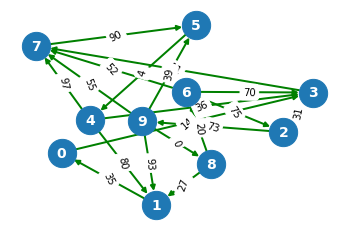

In [215]:
n_dijkstra = random.randint(5,10)
G_dijkstra, fuente_dijkstra = instance_generator_dijkstra(n_dijkstra)
cprint(f"Grafo de entrada: {G_dijkstra}", 'yellow', attrs=["bold"])
cprint(f"Número de nodos: {n_dijkstra}")
cprint(f"Fuente: {fuente_dijkstra}", "yellow", attrs=["bold"])

distancias = dijkstraAlgorithm(G_dijkstra, fuente_dijkstra, n_dijkstra, verbose = False, visualize  = True)

###2.1.4 Ejecución del algoritmo paso a paso (`verbose = True`)
Al determinar que `verbose` sea igual a `True` en todas las funciones, al ejecutar el programa mostrarán cómo se realiza todo paso a paso, tal como se ve a continuación:

In [216]:
n_dijkstra = random.randint(5,10)
G_dijkstra, fuente_dijkstra = instance_generator_dijkstra(n_dijkstra)
cprint(f"Grafo de entrada: {G_dijkstra}", 'yellow', attrs=["bold"])
cprint(f"Número de nodos: {n_dijkstra}")
cprint(f"Fuente: {fuente_dijkstra}", "yellow", attrs=["bold"])

distancias = dijkstraAlgorithm(G_dijkstra, fuente_dijkstra, n_dijkstra, verbose = True, visualize  = False)

Grafo de entrada: [(0, 4, 68), (0, 1, 20), (4, 1, 46), (4, 2, 56), (1, 2, 93), (1, 3, 93), (3, 2, 45), (3, 0, 81)]
Número de nodos: 5
Fuente: 0


##2.2 Algoritmo de Bellman-Ford

In [242]:
from termcolor import cprint

#Función que permite imprimir las distancias en un formato intuitivo
def imprimirDistancias(G, nodos, distancias):
  print("Distancia de cada vértice desde la fuente:")
  for i in range(len(distancias)):
    print("{0}\t\t{1}".format(i, distancias[i]))

def bellmanFordAlgorithm(G, s, nodos, verbose, visualize):
  if verbose == True: print("--------------------")
  #Inicializamos el arreglo con un número cercano al infinito positivo
  distancias = [99999999] * nodos
  distancias[s] = 0 #Puesto que es el origen, se inicializa la distancia de s como 0
  if verbose == True: print(f"Se inicializa la lista de distancias: {distancias}")

  if visualize == True:
    G_to_networkx = graph_to_nxdigraph(G, nodos) #Se transforma nuestro grafo a uno compatible con la libreria networkx
    pos=nx.spring_layout(G_to_networkx)
    labels = nx.get_edge_attributes(G_to_networkx,'weight') #Se agregan los pesos a nuestro grafo visual
    #Con ayuda de los comandos proveídos por networkx, mostramos en pantalla el grafo en el que se está trabajando
    nx.draw_networkx_edge_labels(G_to_networkx,pos,edge_labels=labels,font_size=10)
    nx.draw(G_to_networkx, pos, with_labels = True, node_size=800, font_color="white", font_size=14, font_weight="black", width  =2.0, edge_color ="green")

  #Recorremos cada uno de los arcos (nodos-1) veces, lo que nos permite entregar una solución más completa que verifica cada nodo restante desde la fuente
  if verbose == True: print("\nComenzamos a recorrer todos los arcos del grafo...")
  for i in range(nodos-1):
    if verbose == True: 
      print(f"Iteración {i+1}")
      print("Recorremos el grafo")
    for u, v, w in G: #Se recorre el grafo
      if verbose == True: print(f"Se analiza la conexión [{u},{v},{w}]")
      #Si esto se cumple, distancias[v] guardará el camino más corto posible entre el vértice fuente y el nodo indicado
      if distancias[u] != 99999999 and distancias[u] + w < distancias[v]:
        distancias[v] = distancias[u] + w
        if verbose == True: print(f"Nuevo camino más corto entre {s} y {v}! --> {distancias[v]}")
  
  #Luego, se chequea la existencia de ciclos negativos. Si se obtiene un camino más corto a alguno de
  #los calculados anteriormente, retornamos una lista vacía.

  if verbose == True: print("Ahora se buscan ciclos negativos...")
  for u, v, w in G:
    if distancias[u] != 99999999 and distancias[u] + w < distancias[v]:
      if verbose == True: print(f"Oh no! Se ha encontrado un ciclo negativo. Se retorna la lista {[]}")
      print("CICLO NEGATIVO!")
      if verbose == True: print("--------------------")
      return []

  if verbose == True:
    print("\nNo se ha encontrado ningún ciclo negativo. Retornamos la lista de distancias") 
    print("--------------------")
  return distancias #Finalmente, se retorna la lista que contiene los caminos más cortos desde el vértice fuente
                    #hasta cada uno de los nodos restantes del grafo

#Ejemplo
n_bellman = random.randint(5,25)
G_bellman, fuente_bellman = instance_generator_bellman(n_bellman)

cprint(f"Grafo de entrada: {G_bellman}", 'yellow', attrs=["bold"])
cprint(f"Número de nodos: {n_bellman}")
cprint(f"Fuente: {fuente_bellman}", "yellow", attrs=["bold"])

distancias = bellmanFordAlgorithm(G_bellman, fuente_bellman, n_bellman, verbose = False, visualize  = False)

if (distancias != []): imprimirDistancias(G_bellman, n_bellman, distancias)

Grafo de entrada: [(20, 10, 73), (20, 7, 22), (2, 14, 38), (2, 11, 55), (2, 1, 60), (3, 16, 15), (11, 8, 37), (11, 15, 96), (11, 14, 95), (1, 4, 71), (1, 0, 37), (1, 15, 37), (10, 7, 8), (6, 1, 41), (15, 9, 74), (13, 4, 53), (18, 5, 26), (5, 0, 10), (5, 6, 91), (5, 11, 44), (17, 7, 78), (17, 8, 20), (9, 1, 89), (9, 17, 8), (16, 7, 19), (16, 6, 88), (0, 9, 79), (0, 3, 84), (19, 15, 70), (19, 9, 87), (7, 6, 62), (7, 14, 100), (14, 9, 19), (14, 17, 81), (14, 13, 70), (4, 11, 87), (4, 0, 74), (4, 2, 33), (12, 5, 71), (18, 12, 22), (2, 18, 82), (8, 20, -19), (20, 19, 1)]
Número de nodos: 21
Fuente: 20
Distancia de cada vértice desde la fuente:
0		162
1		125
2		229
3		246
4		196
5		337
6		84
7		22
8		116
9		88
10		73
11		283
12		333
13		192
14		122
15		71
16		261
17		96
18		311
19		1
20		0


###2.2.1 Descripción del algoritmo
Este algoritmo recibe un grafo dirigido $G = (V,E)$ que puede poseer arcos negativos, un vértice fuente $s \in V$ y la cantidad de nodos $V$. Al realizar el proceso, éste puede retornar alguna de estas dos salidas:
1. Si no se encuentran ciclos negativos en el grafo, se retorna una lista con la distancia más corta entre $s$ y cada uno de los demás vértices del grafo.
2. En el caso contrario, se retorna una lista vacía y se muestra un mensaje en pantalla indicando la presencia de un ciclo negativo en $G$.

Cabe notar que Bellman-Ford trabaja bajo el paradigma de **programación dinámica**, por lo tanto será necesario definir su subestructura óptima, y en consecuencia su función de recurrencia, lo cual hace posible su implementación bottom-up.

###**Subestructura óptima:**
En términos generales, deseamos encontrar la ruta óptima $P$ considerando $i$ arcos o menos, puesto que no sabemos la cantidad específica de arcos de la ruta óptima. Si definimos esto, pueden ocurrir dos situaciones:
1. La ruta más corta tiene $i-1$ arcos o menos, por lo que tan solo bastaría con encontrar ésta.
2. La ruta más corta posee efectivamente $i$ arcos, por lo que se realiza la subdivisión de problemas especificada en la siguiente imagen.
![image](https://chartreuse-goal-d5c.notion.site/image/https%3A%2F%2Fs3-us-west-2.amazonaws.com%2Fsecure.notion-static.com%2Ffddd9b5c-071a-4413-8f7d-229ad407e880%2FUntitled.png?table=block&id=e9d843f8-abec-4773-925d-3e254110810d&spaceId=4f8bebe4-a843-44d2-b6ee-51e2006a90d1&width=2000&userId=&cache=v2)

Como se puede observar, la ruta más corta $P$ se puede obtener calculando las rutas más cortas $P'$ entre $s$ y un nodo intermedio $w$, limitada a $i-1$ arcos. Luego, tan solo sumamos la distancia entre $w$ y $v$, lo cual se espera nos deje con la mejor alternativa. Por lo tanto, y viendo como es que la cantidad máxima de arcos para una ruta más corta es de $n-1$, para obtener la mejor solución al problema original debemos encontrar la ruta más corta con $i = n-1$.

Así, básandonos en este análisis previo, llegamos al siguiente lema que definirá nuestra subestructura óptima:

*Sea $G=(V,E)$ un grafo dirigido con largo de arcos reales y una fuente $s \in V$. Suponiendo que $i \geq 1$ y $v\in V$, y sea $P$ la ruta más corta $s \leadsto v$ en $G$ con $i$ arcos o menos. Entonces, una de las dos afirmaciones siguientes es verdadera:*

- *$P$ es la ruta más corta con $i-1$ arcos o menos.*
- *$P$ es, para algún valor $w \in V$, la ruta más corta $s\leadsto w$ con $i-1$ arcos o menos, adicionada con el arco $(w,v) \in E$.*

Finalmente, como consecuencia de estos subproblemas, es posible definir nuestra **función de recurrencia**, donde consideramos a $L_{i,v}$ como el largo mínimo de un camino $s\leadsto v$ con a lo más $i-1$ arcos y ciclos permitidos. Luego, para todo $i\geq 1$ y $v \in V$ tenemos que:

$L_{i,v} =
\min \left\{
 \begin{array}{cc}
 L_{i-1,v} & \text{(caso 1)} \\
 \min\limits_{(w,v)\in E} \{L_{i-1,w}+l_{wv}\} & \text{(caso 2)}
    	\end{array}
\right\}$

Siendo los **subproblemas base**, para todo $v \in V$, los siguientes:
$L_{0,v} =
\left\{
\begin{array}{cc}
0 & \text{si $$s=v$$} \\
+\infty & \text{en otro caso.}
\end{array}
\right.$

Por lo tanto, y luego de comprender la construcción del algoritmo de Bellman-Ford en base a esta subestructura óptima, construimos nuestro algoritmo con implementación bottom-up, el cual en términos generales funciona de la siguiente manera:
1. Se crea la lista $distancias$, la cual contendrá cada distancia desde el vértice fuente hacia los nodos restantes. Cada posición, con excepción de la posición $s$, se inicializan con el valor $99999999$, mientras que la mencionada contiene el valor $0$, que simboliza la distancia nula desde $s$ hasta sí mismo.
2. Luego, en un ciclo `for` que recorre todo el grafo $G$ hasta $nodos-1$ veces, se analiza cada conexión $[u, v, w]$, con $u$ un nodo y $v$ otro, además de $w$ como el peso del arco entre ambos, donde se toma uno de los siguientes caminos: si $distancias[u] + w$ es menor a $distancias[v]$, ahora esta última posición almacenará el nuevo camino más corto; si esto no sucede, tan solo avanzamos al siguiente nodo, sabiendo que $distancias[v]$ almacenará la solución óptima hasta esa iteración.
3. Al finalizar el ciclo anterior, se chequea la presencia de ciclos negativos con ayuda de otro `for`, en donde por cada nodo del grafo $G$ se observa si $distancias[v]$ es mayor a $distancias[u] + w$. Si esto sucede, efectivamente se ha encontrado uno de éstos, por lo que se retorna una lista vacía y se imprime en pantalla el mensaje *CICLO NEGATIVO!*.
4. Finalmente, y tras verificar la no existencia de este fenómeno en el grafo, se retorna la lista $distancias$.

![image](https://upload.wikimedia.org/wikipedia/commons/7/77/Bellman%E2%80%93Ford_algorithm_example.gif?20220707105220)

###2.2.2 Ejemplo

###2.2.3 Visualización del grafo a trabajar
Al determinar que `visualize` sea igual a `True`, se mostrará en pantalla de forma gráfica el grafo en el que se está trabajando. Como ayuda, utilizamos la librería externa **networkx**. A continuación se muestra lo especificado:

Grafo de entrada: [(4, 1, 92), (4, 0, 11), (4, 3, 41), (3, 2, 48), (3, 1, 4), (2, 1, 91), (0, 1, 76), (2, 4, 52)]
Número de nodos: 5
Fuente: 4
Distancia de cada vértice desde la fuente:
0		11
1		45
2		89
3		41
4		0


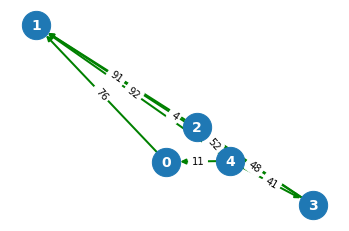

In [218]:
n_bellman = random.randint(5,10)
G_bellman, fuente_bellman = instance_generator_bellman(n_bellman)
cprint(f"Grafo de entrada: {G_bellman}", 'yellow', attrs=["bold"])
cprint(f"Número de nodos: {n_bellman}")
cprint(f"Fuente: {fuente_bellman}", "yellow", attrs=["bold"])

distancias = bellmanFordAlgorithm(G_bellman, fuente_bellman, n_bellman, verbose = False, visualize  = True)
if (distancias != []): imprimirDistancias(G_bellman, n_bellman, distancias)

###2.2.4 Ejecución del algoritmo paso a paso (`verbose = True`)
Al determinar que `verbose` sea igual a `True` en todas las funciones, al ejecutar el programa mostrarán cómo se realiza todo paso a paso, tal como se ve a continuación:

In [241]:
n_bellman = random.randint(5,10)
G_bellman, fuente_bellman = instance_generator_bellman(n_bellman)
cprint(f"Grafo de entrada: {G_bellman}", 'yellow', attrs=["bold"])
cprint(f"Número de nodos: {n_bellman}")
cprint(f"Fuente: {fuente_bellman}", "yellow", attrs=["bold"])

distancias = bellmanFordAlgorithm(G_bellman, fuente_bellman, n_bellman, verbose = True, visualize  = False)
if (distancias != []): imprimirDistancias(G_bellman, n_bellman, distancias)

Grafo de entrada: [(3, 2, 53), (2, 0, 66), (2, 4, 31), (0, 1, 22), (0, 3, 46), (0, 4, 85), (1, 4, 83), (4, 3, 62)]
Número de nodos: 5
Fuente: 3
--------------------
Se inicializa la lista de distancias: [99999999, 99999999, 99999999, 0, 99999999]

Comenzamos a recorrer todos los arcos del grafo...
Iteración 1
Recorremos el grafo
Se analiza la conexión [3,2,53]
Nuevo camino más corto entre 3 y 2! --> 53
Se analiza la conexión [2,0,66]
Nuevo camino más corto entre 3 y 0! --> 119
Se analiza la conexión [2,4,31]
Nuevo camino más corto entre 3 y 4! --> 84
Se analiza la conexión [0,1,22]
Nuevo camino más corto entre 3 y 1! --> 141
Se analiza la conexión [0,3,46]
Se analiza la conexión [0,4,85]
Se analiza la conexión [1,4,83]
Se analiza la conexión [4,3,62]
Iteración 2
Recorremos el grafo
Se analiza la conexión [3,2,53]
Se analiza la conexión [2,0,66]
Se analiza la conexión [2,4,31]
Se analiza la conexión [0,1,22]
Se analiza la conexión [0,3,46]
Se analiza la conexión [0,4,85]
Se analiza la c

#3. Correctitud del algoritmo de Bellman-Ford

##3.1 Teorema
>*El algoritmo de Bellman-Ford recibe un grafo dirigido de $n$ nodos y un vértice fuente $s$, y posee dos salidas:*
1. *Retorna la lista de distancias o caminos más cortos entre el vértice fuente y los demás nodos del grafo.*
2. *En caso de encontrar un ciclo negativo, retorna una lista vacía e imprime en pantalla un mensaje señalando aquello.*

##3.2 Prueba del teorema
En este caso, el teorema correspondiente al algoritmo estudiado será corroborado por medio de **inducción matemática**, donde tendremos una declaración o hipótesis $P(n)$.

**Hipótesis:** Bellman-Ford, luego de $i$ iteraciones del primer ciclo $for$, genera la lista $distancias$, donde si $distancias[u]$ no es $99999999$, éste es igual al largo de un camino entre $s$ y $u$; y si existe un camino entre estos dos nodos con a lo más $i$ arcos, entonces $distancias[u]$ contiene a lo más el largo del camino más corto desde $s$ hasta $u$.

**Caso base (i = 0):**

#4. Tiempo de ejecución

#5. Experimentos